# Librerías

In [182]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

# Carga y preparación de los datos

In [183]:
### Load file --------------------------------------------
df_IRRAD = pd.read_csv('data/G04A_DATOS_IRRAD.csv', sep = ",")
df_IRRAD.head()

,FECHA,IRRADH00,IRRADH03,IRRADH06,IRRADH09,IRRADH12,IRRADH15,IRRADH18,IRRADH21,ANNO,MES,DIA,DIASEM
0,2015-01-01,0.0,0.0,0.0,589813.00,1294089.50,468098.47,0.0,0.0,2015,1,1,3
1,2015-01-02,0.0,0.0,0.0,438244.75,989406.00,272884.66,0.0,0.0,2015,1,2,4
2,2015-01-03,0.0,0.0,0.0,543215.75,1162550.80,359685.12,0.0,0.0,2015,1,3,5
3,2015-01-04,0.0,0.0,0.0,504131.56,1229353.20,460497.50,0.0,0.0,2015,1,4,6
4,2015-01-05,0.0,0.0,0.0,502349.70,1012553.75,391783.16,0.0,0.0,2015,1,5,0


In [184]:
### Load file --------------------------------------------
df_UTIL = pd.read_csv('data/G04A_DATOS_UTIL.csv', sep = ",")
df_UTIL.head()

,FECHA,UTILH00,UTILH03,UTILH06,UTILH09,UTILH12,UTILH15,UTILH18,UTILH21,ANNO,MES,DIA,DIASEM
0,2015-01-01,0.000023,0.000008,0.053105,0.590946,0.615057,0.091254,0.000008,0.000019,2015,1,1,3
1,2015-01-02,0.000012,0.000004,0.048031,0.397291,0.396714,0.048448,0.000000,0.000008,2015,1,2,4
2,2015-01-03,0.000008,0.000000,0.049542,0.557435,0.604719,0.091748,0.000004,0.000004,2015,1,3,5
3,2015-01-04,0.000008,0.000000,0.014918,0.375060,0.547907,0.090296,0.000016,0.000023,2015,1,4,6
4,2015-01-05,0.000008,0.000008,0.016370,0.167025,0.246309,0.051614,0.000004,0.000000,2015,1,5,0


Unimos todo en un mismo dataframe


In [185]:
df_aux = pd.merge(df_IRRAD, df_UTIL, on='FECHA')

In [186]:
df_aux

,FECHA,IRRADH00,IRRADH03,IRRADH06,IRRADH09,IRRADH12,IRRADH15,IRRADH18,IRRADH21,ANNO_x,...,UTILH06,UTILH09,UTILH12,UTILH15,UTILH18,UTILH21,ANNO_y,MES_y,DIA_y,DIASEM_y
0,2015-01-01,0.0,0.0,0.0,589813.00,1294089.50,468098.470,0.0,0.0,2015,...,0.053105,0.590946,0.615057,0.091254,0.000008,0.000019,2015,1,1,3
1,2015-01-02,0.0,0.0,0.0,438244.75,989406.00,272884.660,0.0,0.0,2015,...,0.048031,0.397291,0.396714,0.048448,0.000000,0.000008,2015,1,2,4
2,2015-01-03,0.0,0.0,0.0,543215.75,1162550.80,359685.120,0.0,0.0,2015,...,0.049542,0.557435,0.604719,0.091748,0.000004,0.000004,2015,1,3,5
3,2015-01-04,0.0,0.0,0.0,504131.56,1229353.20,460497.500,0.0,0.0,2015,...,0.014918,0.375060,0.547907,0.090296,0.000016,0.000023,2015,1,4,6
4,2015-01-05,0.0,0.0,0.0,502349.70,1012553.75,391783.160,0.0,0.0,2015,...,0.016370,0.167025,0.246309,0.051614,0.000004,0.000000,2015,1,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2187,2020-12-27,0.0,0.0,0.0,176437.95,596362.94,213554.200,0.0,0.0,2020,...,0.012102,0.068252,0.070849,0.012841,0.000003,0.000003,2020,12,27,6
2188,2020-12-28,0.0,0.0,0.0,573497.50,1097877.50,269206.560,0.0,0.0,2020,...,0.032334,0.334919,0.285503,0.046018,0.000003,0.000007,2020,12,28,0
2189,2020-12-29,0.0,0.0,0.0,425860.56,801252.40,237152.560,0.0,0.0,2020,...,0.023633,0.245105,0.282372,0.017419,0.000007,0.000007,2020,12,29,1
2190,2020-12-30,0.0,0.0,0.0,214860.45,321715.56,29951.986,0.0,0.0,2020,...,0.010654,0.134742,0.076885,0.005577,0.000010,0.000000,2020,12,30,2


Realizamos el melt 

In [187]:
id_vars = ['FECHA', 'ANNO_x', 'MES_x', 'DIA_x', 'DIASEM_x']

irrad_melt = pd.melt(df_aux, id_vars=id_vars, value_vars=['IRRADH00', 'IRRADH03', 'IRRADH06', 'IRRADH09', 'IRRADH12', 'IRRADH15', 'IRRADH18', 'IRRADH21'], var_name='HOUR', value_name='IRRAD_VALUE')

util_melt = pd.melt(df_aux, id_vars=id_vars, value_vars=['UTILH00', 'UTILH03', 'UTILH06', 'UTILH09', 'UTILH12', 'UTILH15', 'UTILH18', 'UTILH21'], var_name='HOUR', value_name='UTIL_VALUE')

irrad_melt['HOUR'] = irrad_melt['HOUR'].str.extract('(\d+)')
util_melt['HOUR'] = util_melt['HOUR'].str.extract('(\d+)')

df = pd.merge(irrad_melt, util_melt, on=id_vars + ['HOUR'])

In [188]:
df

,FECHA,ANNO_x,MES_x,DIA_x,DIASEM_x,HOUR,IRRAD_VALUE,UTIL_VALUE
0,2015-01-01,2015,1,1,3,00,0.0,0.000023
1,2015-01-02,2015,1,2,4,00,0.0,0.000012
2,2015-01-03,2015,1,3,5,00,0.0,0.000008
3,2015-01-04,2015,1,4,6,00,0.0,0.000008
4,2015-01-05,2015,1,5,0,00,0.0,0.000008
...,...,...,...,...,...,...,...,...
17531,2020-12-27,2020,12,27,6,21,0.0,0.000003
17532,2020-12-28,2020,12,28,0,21,0.0,0.000007
17533,2020-12-29,2020,12,29,1,21,0.0,0.000007
17534,2020-12-30,2020,12,30,2,21,0.0,0.000000


Se puede visualizar como la variable fecha, tiene una periodicidad por año, por tanto borramos esta variable

In [189]:
df = df.drop(['DIASEM_x'], axis=1)

In [190]:
df

,FECHA,ANNO_x,MES_x,DIA_x,HOUR,IRRAD_VALUE,UTIL_VALUE
0,2015-01-01,2015,1,1,00,0.0,0.000023
1,2015-01-02,2015,1,2,00,0.0,0.000012
2,2015-01-03,2015,1,3,00,0.0,0.000008
3,2015-01-04,2015,1,4,00,0.0,0.000008
4,2015-01-05,2015,1,5,00,0.0,0.000008
...,...,...,...,...,...,...,...
17531,2020-12-27,2020,12,27,21,0.0,0.000003
17532,2020-12-28,2020,12,28,21,0.0,0.000007
17533,2020-12-29,2020,12,29,21,0.0,0.000007
17534,2020-12-30,2020,12,30,21,0.0,0.000000


# CUIDADO CON EL TEMA DEL ONE HOT ENCODER

In [191]:
df['FECHA'] = pd.to_datetime(df['FECHA'])

df['dia_mes'] = df['FECHA'].dt.dayofyear

print(df)

           FECHA  ANNO_x  MES_x  DIA_x HOUR  IRRAD_VALUE  UTIL_VALUE  dia_mes
0     2015-01-01    2015      1      1   00          0.0    0.000023        1
1     2015-01-02    2015      1      2   00          0.0    0.000012        2
2     2015-01-03    2015      1      3   00          0.0    0.000008        3
3     2015-01-04    2015      1      4   00          0.0    0.000008        4
4     2015-01-05    2015      1      5   00          0.0    0.000008        5
...          ...     ...    ...    ...  ...          ...         ...      ...
17531 2020-12-27    2020     12     27   21          0.0    0.000003      362
17532 2020-12-28    2020     12     28   21          0.0    0.000007      363
17533 2020-12-29    2020     12     29   21          0.0    0.000007      364
17534 2020-12-30    2020     12     30   21          0.0    0.000000      365
17535 2020-12-31    2020     12     31   21          0.0    0.000010      366

[17536 rows x 8 columns]


In [192]:
df = df.drop(['FECHA'], axis=1)
df

,ANNO_x,MES_x,DIA_x,HOUR,IRRAD_VALUE,UTIL_VALUE,dia_mes
0,2015,1,1,00,0.0,0.000023,1
1,2015,1,2,00,0.0,0.000012,2
2,2015,1,3,00,0.0,0.000008,3
3,2015,1,4,00,0.0,0.000008,4
4,2015,1,5,00,0.0,0.000008,5
...,...,...,...,...,...,...,...
17531,2020,12,27,21,0.0,0.000003,362
17532,2020,12,28,21,0.0,0.000007,363
17533,2020,12,29,21,0.0,0.000007,364
17534,2020,12,30,21,0.0,0.000000,365


In [193]:
X = df.drop('UTIL_VALUE', axis=1)
y = df['UTIL_VALUE']

X['HOUR'] = pd.to_numeric(X['HOUR'], errors='coerce')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Preprocesamiento (valores faltantes o categóricos)

In [194]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# Asignación de características numéricas y definición de su transformador
# Excluye las columnas que se tratarán como categóricas
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns.drop(['ANNO_x', 'MES_x', 'DIA_x'])

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# Asignación de características categóricas explícitas
categorical_features = ['ANNO_x', 'MES_x', 'DIA_x']

# Definición del transformador categórico con imputación y codificación One-Hot
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Si las columnas ya son de tipo numérico, cámbialas a tipo object para tratarlas como categóricas.
for col in categorical_features:
    X_train[col] = X_train[col].astype('object')
    X_test[col] = X_test[col].astype('object')

# Preprocesador que aplica las transformaciones numéricas y categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Aplicación del preprocesador a los conjuntos de datos de entrenamiento y prueba
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep = preprocessor.transform(X_test)


### Entrenamiento del modelo

In [195]:
model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
model.fit(X_train_prep, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

### Evaluación del modelo

In [196]:
y_pred = model.predict(X_test_prep)

mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.4f}, RMSE: {rmse:.4f}, R^2: {r2:.4f}")

MSE: 0.0044, RMSE: 0.0665, R^2: 0.9268


In [197]:
y_pred

array([ 0.00579172, -0.00535112,  0.7157191 , ...,  0.01701348,
        0.00302946,  0.6131721 ], dtype=float32)

### Ajuste fino de hiperparámetros (Gridsearch)

In [198]:
param_grid = {
    # Aumenta en incrementos más pequeños, pero aún significativos para ver el efecto.
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [1, 2, 3, 4, 5, 6, 7],
    # Añade más valores para una búsqueda más granular, pero mantén el incremento razonable.
    'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)

grid_search.fit(X_train_prep, y_train)

best_model = grid_search.best_estimator_
print(f'Mejores parámetros: {grid_search.best_params_}')


Fitting 3 folds for each of 175 candidates, totalling 525 fits
[CV] END ..learning_rate=0.01, max_depth=1, n_estimators=100; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=1, n_estimators=100; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=1, n_estimators=100; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=1, n_estimators=200; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=1, n_estimators=200; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=1, n_estimators=200; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=1, n_estimators=300; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=1, n_estimators=300; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=1, n_estimators=300; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=1, n_estimators=400; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=1, n_estimators=400; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=2, n_

### Evaluación final del modelo ajustado

In [199]:
y_pred_best = best_model.predict(X_test_prep)

mse_best = mean_squared_error(y_test, y_pred_best)
rmse_best = mse_best ** 0.5
r2_best = r2_score(y_test, y_pred_best)

print(f"MSE (ajustado): {mse_best:.4f}, RMSE (ajustado): {rmse_best:.4f}, R^2 (ajustado): {r2_best:.4f}")

MSE (ajustado): 0.0043, RMSE (ajustado): 0.0659, R^2 (ajustado): 0.9282


In [200]:
import pandas as pd
import numpy as np
from xgboost import plot_importance

# Asigna los nombres de las características transformadas numéricas directamente
transformed_numeric_features = numeric_features.tolist()

# Obtiene los nombres de las características categóricas transformadas del one-hot encoder
# Utiliza get_feature_names si estás utilizando una versión de scikit-learn < 0.22
# o get_feature_names_out si estás utilizando scikit-learn >= 0.22
transformed_categorical_features = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features)

# Combina los nombres de todas las características transformadas
all_transformed_features = transformed_numeric_features + transformed_categorical_features.tolist()

# Obtiene la importancia de las características del modelo XGBoost
feature_importances = model.feature_importances_

# Crea un DataFrame con los nombres de las características y su importancia
importances_df = pd.DataFrame({
    'Feature': all_transformed_features,
    'Importance': feature_importances
})

# Ordena las características por su importancia
importances_df_sorted = importances_df.sort_values(by='Importance', ascending=False)

# Muestra las características más importantes
print(importances_df_sorted)


        Feature  Importance
1   IRRAD_VALUE    0.419644
0          HOUR    0.134151
17     MES_x_10    0.024133
9       MES_x_2    0.022002
8       MES_x_1    0.021360
10      MES_x_3    0.017212
13      MES_x_6    0.016952
18     MES_x_11    0.013646
19     MES_x_12    0.012701
16      MES_x_9    0.012071
28      DIA_x_9    0.011856
7   ANNO_x_2020    0.011853
12      MES_x_5    0.011206
33     DIA_x_14    0.010941
39     DIA_x_20    0.010620
50     DIA_x_31    0.010513
11      MES_x_4    0.010333
32     DIA_x_13    0.009175
15      MES_x_8    0.009156
14      MES_x_7    0.008803
44     DIA_x_25    0.008690
5   ANNO_x_2018    0.008544
35     DIA_x_16    0.008195
25      DIA_x_6    0.007848
2   ANNO_x_2015    0.007720
49     DIA_x_30    0.007695
23      DIA_x_4    0.007675
21      DIA_x_2    0.007595
36     DIA_x_17    0.007568
31     DIA_x_12    0.007547
43     DIA_x_24    0.007441
40     DIA_x_21    0.006810
3   ANNO_x_2016    0.006551
46     DIA_x_27    0.006531
48     DIA_x_29    0

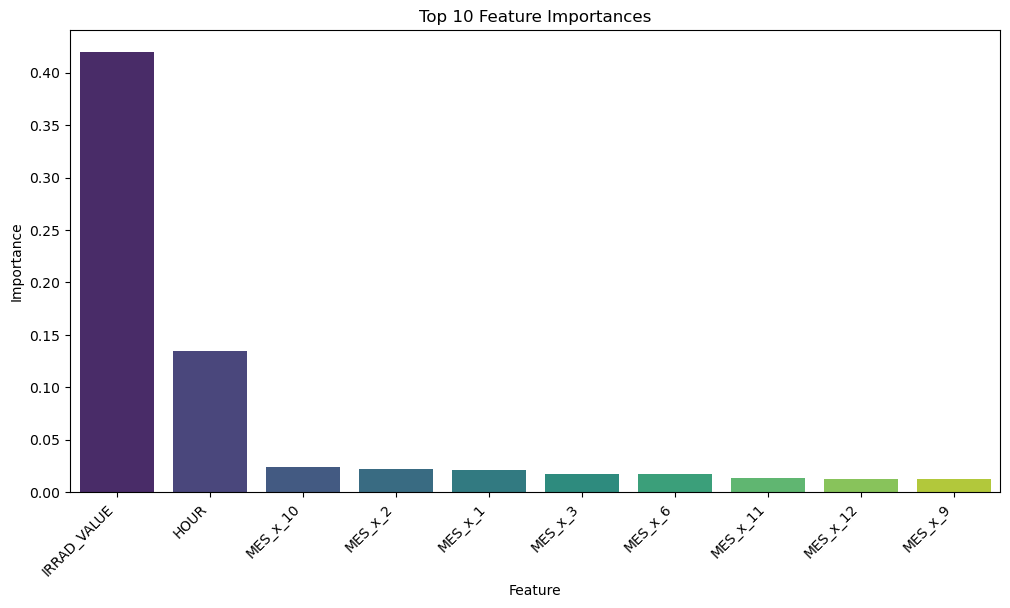

In [201]:
# Filtrar las 10 características más importantes
top_10_importances = importances_df_sorted.head(10)

# Generar el gráfico de barras verticales
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_importances, y='Importance', x='Feature', palette="viridis")
plt.title('Top 10 Feature Importances')
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.xticks(rotation=45, ha="right")
plt.show()


Predictions

In [208]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# Asumiendo que 'model' es tu modelo XGBoost entrenado
# y que 'X_train_prep' y 'X_test_prep' son tus datos de entrenamiento y prueba preprocesados

# Realizar predicciones en el conjunto de entrenamiento
y_train_pred_xgb = model.predict(X_train_prep)

# Realizar predicciones en el conjunto de prueba
y_test_pred_xgb = model.predict(X_test_prep)

# A continuación, puedes calcular métricas de desempeño basadas en estas predicciones
# Calculando MSE, RMSE, y R^2 para el conjunto de entrenamiento
mse_train_xgb = mean_squared_error(y_train, y_train_pred_xgb)
rmse_train_xgb = mse_train_xgb ** 0.5
r2_train_xgb = r2_score(y_train, y_train_pred_xgb)

# Calculando MSE, RMSE, y R^2 para el conjunto de prueba
mse_test_xgb = mean_squared_error(y_test, y_test_pred_xgb)
rmse_test_xgb = mse_test_xgb ** 0.5
r2_test_xgb = r2_score(y_test, y_test_pred_xgb)

# Imprimir los resultados
print(f"Entrenamiento - MSE: {mse_train_xgb:.4f}, RMSE: {rmse_train_xgb:.4f}, R^2: {r2_train_xgb:.4f}")
print(f"Prueba - MSE: {mse_test_xgb:.4f}, RMSE: {rmse_test_xgb:.4f}, R^2: {r2_test_xgb:.4f}")


Entrenamiento - MSE: 0.0016, RMSE: 0.0405, R^2: 0.9726
Prueba - MSE: 0.0044, RMSE: 0.0665, R^2: 0.9268


  Metric     Train      Test
0    MSE  0.001639  0.004429
1   RMSE  0.040484  0.066548
2     R2  0.972625  0.926845
3    MAE  0.022562  0.036234


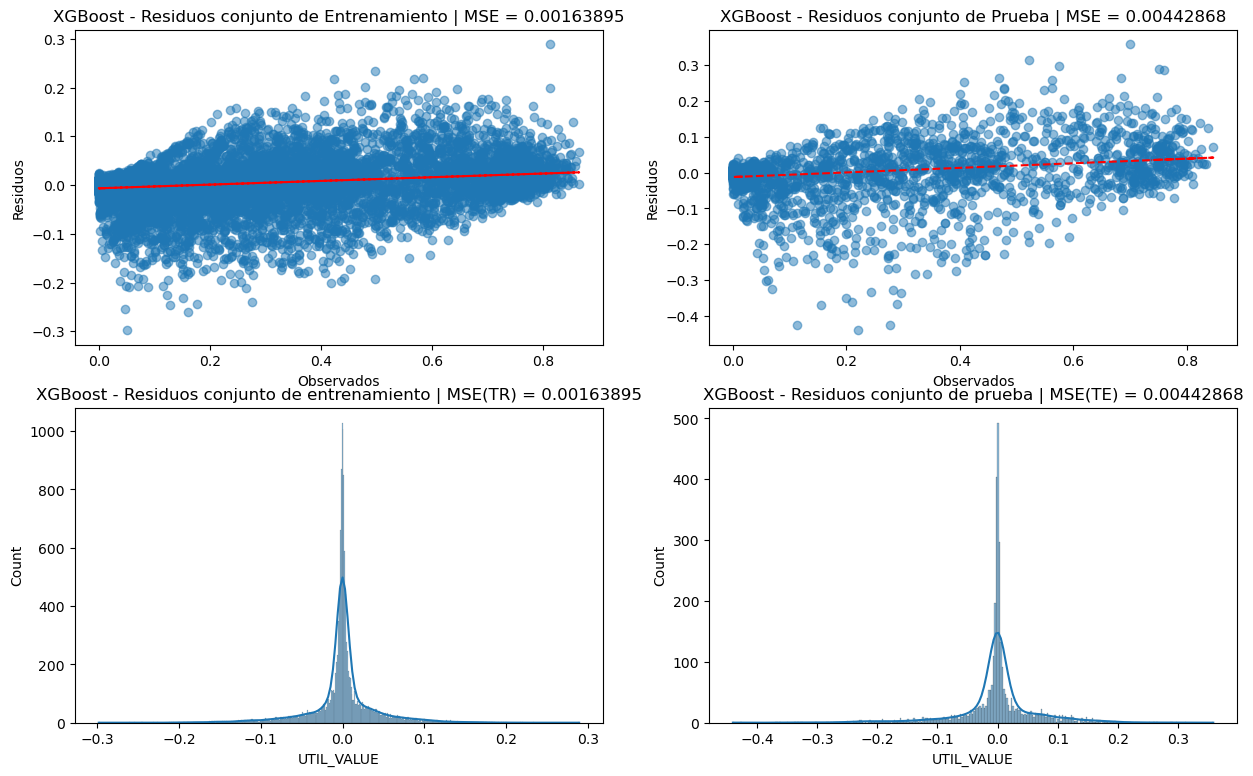

In [210]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

# Suponiendo que y_train, y_test, y_train_pred_xgb, y_test_pred_xgb están definidos previamente

# Evaluar el desempeño del modelo XGBoost

# Error Cuadrático Medio (MSE)
mse_train_xgb = metrics.mean_squared_error(y_train, y_train_pred_xgb)
mse_test_xgb = metrics.mean_squared_error(y_test, y_test_pred_xgb)

# Raíz del Error Cuadrático Medio (RMSE)
rmse_train_xgb = np.sqrt(mse_train_xgb)
rmse_test_xgb = np.sqrt(mse_test_xgb)

# Coeficiente de Determinación (R^2)
r2_train_xgb = metrics.r2_score(y_train, y_train_pred_xgb)
r2_test_xgb = metrics.r2_score(y_test, y_test_pred_xgb)

# Error Absoluto Medio (MAE)
mae_train_xgb = metrics.mean_absolute_error(y_train, y_train_pred_xgb)
mae_test_xgb = metrics.mean_absolute_error(y_test, y_test_pred_xgb)

# DataFrame con los resultados
results_xgb = pd.DataFrame({'Metric': ['MSE', 'RMSE', 'R2', 'MAE'],
                            'Train': [mse_train_xgb, rmse_train_xgb, r2_train_xgb, mae_train_xgb],
                            'Test': [mse_test_xgb, rmse_test_xgb, r2_test_xgb, mae_test_xgb]})
print(results_xgb)

# Graficar los residuos (dispersión e histograma) del modelo XGBoost
plt.figure(figsize=(15, 9))

# Calcular residuos
residuals_train_xgb = y_train - y_train_pred_xgb
residuals_test_xgb = y_test - y_test_pred_xgb

# Gráficas de dispersión con línea de tendencia
for i, (y, residuals, title) in enumerate([
    (y_train, residuals_train_xgb, 'Entrenamiento'),
    (y_test, residuals_test_xgb, 'Prueba')
], start=1):
    plt.subplot(2, 2, i)
    plt.scatter(y, residuals, alpha=0.5)
    # Calcular línea de tendencia
    z = np.polyfit(y, residuals, 1)
    p = np.poly1d(z)
    plt.plot(y, p(y), "r--")  # Dibuja la línea de tendencia
    plt.title(f'XGBoost - Residuos conjunto de {title} | MSE = {mse_train_xgb:.8f}' if i == 1 else f'XGBoost - Residuos conjunto de {title} | MSE = {mse_test_xgb:.8f}')
    plt.xlabel('Observados')
    plt.ylabel('Residuos')

# Histogramas
plt.subplot(2, 2, 3)
sns.histplot(residuals_train_xgb, kde=True)
plt.title(f'XGBoost - Residuos conjunto de entrenamiento | MSE(TR) = {mse_train_xgb:.8f}')

plt.subplot(2, 2, 4)
sns.histplot(residuals_test_xgb, kde=True)
plt.title(f'XGBoost - Residuos conjunto de prueba | MSE(TE) = {mse_test_xgb:.8f}')

# Mostrar gráfica
plt.show()
